# NBA Analysis

In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime as dt 
import numpy as np
import matplotlib.pyplot as plt
import re

In [18]:
seasons={}
for year in range(1979,2022):
    
    url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'.format(year)
    r = requests.get(url)
    r_html = r.text
    soup = BeautifulSoup(r_html,'html.parser')
    table=soup.find_all(class_="full_table")
    table=soup.find_all(class_="full_table")

    """ Extracting List of column names"""
    head=soup.find(class_="thead")
    column_names_raw=[head.text for item in head][0]
    column_names_polished=column_names_raw.replace("\n",",").split(",")[2:-1]
    print(column_names_polished)
    ['Player',
     'Pos',
     'Age',
     'Tm',
     'G',
     'GS',
     'MP',
     'FG',
     'FGA',
     'FG%',
     '3P',
     '3PA',
     '3P%',
     '2P',
     '2PA',
     '2P%',
     'eFG%',
     'FT',
     'FTA',
     'FT%',
     'ORB',
     'DRB',
     'TRB',
     'AST',
     'STL',
     'BLK',
     'TOV',
     'PF',
     'PTS']
    """Extracting full list of player_data"""
    players=[]

    for i in range(len(table)):

            player_=[]

            for td in table[i].find_all("td"):
                player_.append(td.text)

            players.append(player_)
    df=pd.DataFrame(players, columns=column_names_polished).set_index("Player")
    #cleaning the player's name from occasional special characters
    df.index=df.index.str.replace('*', '')
    seasons[year]=df


['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
['Player',

['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


In [19]:
url = 'https://www.basketball-reference.com/leaders/ws_career_p.html#tot::2'
playoffs=pd.read_html(url)
playoffs=playoffs[0]
for index, row in playoffs.iterrows():
     playoffs.at[index, 'Player']= re.match(r'[A-Za-z+\s]+', row['Player'] )[0]
playoffs=playoffs.set_index("Player")
playoffs=playoffs.drop('Rank', axis =1)
playoffs



,WS
Player,
LeBron James,55.68
Michael Jordan,39.76
Tim Duncan,37.84
Kareem Abdul,35.56
Magic Johnson,32.63
...,...
Mario Chalmers,5.24
Antonio Daniels,5.19
Andrew Bynum,5.18


In [20]:
for year in seasons:
    seasons[year] =seasons[year].replace(np.NaN,0 )
    seasons[year] =seasons[year].replace('',0 )
    seasons[year]=seasons[year].drop('Pos', axis =1)
    seasons[year]=seasons[year].drop('Age', axis =1)
    seasons[year]=seasons[year].drop('FG%', axis =1)
    seasons[year]=seasons[year].drop('FT%', axis =1)
    seasons[year]=seasons[year].drop('eFG%', axis =1)
    seasons[year]=seasons[year].drop('2P%', axis =1)
    seasons[year]=seasons[year].drop('3P%', axis =1)
    seasons[year]=seasons[year].drop('Tm', axis =1)

In [21]:
combined=seasons[1979].merge(seasons[1980],how='outer', on='Player')
combined.insert(3,'career_PTS', 0)
combined.insert(3,'career_FG', 0)
combined.insert(3,'career_G', 0)
combined.insert(3,'career_GS', 0)
combined.insert(3,'career_MP', 0)
combined.insert(3,'career_FGA', 0)

combined.insert(3,'career_2P', 0)
combined.insert(3,'career_2PA', 0)
combined.insert(3,'career_3P', 0)
combined.insert(3,'career_3PA', 0)
combined.insert(3,'career_FT', 0)
combined.insert(3,'career_FTA', 0)
combined.insert(3,'career_ORB', 0)
combined.insert(3,'career_DRB', 0)

combined.insert(3,'career_TRB', 0)
combined.insert(3,'career_AST', 0)
combined.insert(3,'career_STL', 0)
combined.insert(3,'career_BLK', 0)
combined.insert(3,'career_TOV', 0)
combined.insert(3,'career_PF', 0)
#do percent here
combined.insert(3,'career_FG%', 0)
combined.insert(3,'career_2P%', 0)
combined.insert(3,'career_3P%', 0)
combined.insert(3,'career_FT%', 0)
combined.insert(3,'career_eFG%', 0)
combined =combined.replace(np.NaN,0 )
combined =combined.replace('',0 )

for index, row in combined.iterrows():
    #print(int(row['PTS_x'])+int(row['PTS_y']))
    combined.at[index, 'career_FG']=int(row['FG_x'])+int(row['FG_y'])
    combined.at[index, 'career_PTS']= int(row['PTS_x'])+int(row['PTS_y'])
    combined.at[index, 'career_G']=int(row['G_x'])+int(row['G_y'])
    combined.at[index, 'career_GS']= int(row['GS_x'])+int(row['GS_y'])
    combined.at[index, 'career_MP']= int(row['MP_x'])+int(row['MP_y'])
    combined.at[index, 'career_FGA']= int(row['FGA_x'])+int(row['FGA_y'])
    
    combined.at[index, 'career_2P']=int(row['2P_x'])+int(row['2P_y'])
    combined.at[index, 'career_2PA']= int(row['2PA_x'])+int(row['2PA_y'])
    combined.at[index, 'career_3P']=int(row['3P_x'])+int(row['3P_y'])
    combined.at[index, 'career_3PA']= int(row['3PA_x'])+int(row['3PA_y'])
    combined.at[index, 'career_FT']=int(row['FT_x'])+int(row['FT_y'])
    combined.at[index, 'career_FTA']= int(row['FTA_x'])+int(row['FTA_y'])
    combined.at[index, 'career_ORB']= int(row['ORB_x'])+int(row['ORB_y'])
    combined.at[index, 'career_DRB']= int(row['DRB_x'])+int(row['DRB_y'])
    combined.at[index, 'career_TRB']= int(row['TRB_x'])+int(row['TRB_y'])
    
    combined.at[index, 'career_TRB']= int(row['2PA_x'])+int(row['2PA_y'])
    combined.at[index, 'career_FT']=int(row['FT_x'])+int(row['FT_y'])
    combined.at[index, 'career_FTA']= int(row['FTA_x'])+int(row['FTA_y'])
    combined.at[index, 'career_ORB']= int(row['ORB_x'])+int(row['ORB_y'])
    combined.at[index, 'career_DRB']= int(row['DRB_x'])+int(row['DRB_y'])
    
    combined.at[index, 'career_TRB']=int(row['TRB_x'])+int(row['TRB_y'])
    combined.at[index, 'career_AST']= int(row['AST_x'])+int(row['AST_y'])
    combined.at[index, 'career_STL']= int(row['STL_x'])+int(row['STL_y'])
    combined.at[index, 'career_BLK']= int(row['BLK_x'])+int(row['BLK_y'])
    
    combined.at[index, 'career_TOV']= int(row['TOV_x'])+int(row['TOV_y'])
    combined.at[index, 'career_PF']= int(row['PF_x'])+int(row['PF_y'])
    
   

combined=combined.drop('PTS_y', axis =1)
combined=combined.drop('FG_y', axis =1)
combined=combined.drop('PTS_x', axis =1)
combined=combined.drop('FG_x', axis =1)
combined=combined.drop('G_x', axis =1)
combined=combined.drop('G_y', axis =1)
combined=combined.drop('GS_x', axis =1)
combined=combined.drop('GS_y', axis =1)
combined=combined.drop('MP_x', axis =1)
combined=combined.drop('MP_y', axis =1)
combined=combined.drop('FGA_x', axis =1)
combined=combined.drop('FGA_y', axis =1)
combined=combined.drop('2P_x', axis =1)
combined=combined.drop('2P_y', axis =1)
combined=combined.drop('2PA_x', axis =1)
combined=combined.drop('2PA_y', axis =1)
combined=combined.drop('3P_x', axis =1)
combined=combined.drop('3P_y', axis =1)
combined=combined.drop('3PA_x', axis =1)
combined=combined.drop('3PA_y', axis =1)
combined=combined.drop('FT_x', axis =1)
combined=combined.drop('FT_y', axis =1)
combined=combined.drop('FTA_x', axis =1)
combined=combined.drop('FTA_y', axis =1)
combined=combined.drop('ORB_x', axis =1)
combined=combined.drop('ORB_y', axis =1)
combined=combined.drop('DRB_x', axis =1)
combined=combined.drop('DRB_y', axis =1)
combined=combined.drop('TRB_x', axis =1)
combined=combined.drop('TRB_y', axis =1)
combined=combined.drop('AST_x', axis =1)
combined=combined.drop('AST_y', axis =1)
combined=combined.drop('STL_x', axis =1)
combined=combined.drop('STL_y', axis =1)
combined=combined.drop('BLK_x', axis =1)
combined=combined.drop('BLK_y', axis =1)
combined=combined.drop('TOV_x', axis =1)
combined=combined.drop('TOV_y', axis =1)
combined=combined.drop('PF_x', axis =1)
combined=combined.drop('PF_y', axis =1)


#print(seasons[1997].loc['Michael Jordan'], combined.loc['Michael Jordan'])

In [23]:
for year in range(1979,2022):
  
    print(year)
    combined=combined.merge(seasons[year],how='outer', on='Player')
       
    combined =combined.replace(np.NaN,0 )
   
    for index, row in combined.iterrows():
        
        combined.at[index, 'career_FG']=int(row['career_FG'])+int(row['FG'])
        combined.at[index, 'career_PTS']= int(row['career_PTS'])+int(row['PTS'])
        combined.at[index, 'career_G']= int(row['career_G'])+int(row['G'])
        combined.at[index, 'career_GS']= int(row['career_GS'])+int(row['GS'])
        combined.at[index, 'career_MP']= int(row['career_MP'])+int(row['MP'])
        combined.at[index, 'career_FGA']= int(row['career_FGA'])+int(row['FGA'])
        
        combined.at[index, 'career_2P']=int(row['career_2P'])+int(row['2P'])
        combined.at[index, 'career_2PA']= int(row['career_2PA'])+int(row['2PA'])
        combined.at[index, 'career_3P']=int(row['career_3P'])+int(row['3P'])
        combined.at[index, 'career_3PA']= int(row['career_3PA'])+int(row['3PA'])
        combined.at[index, 'career_FT']= int(row['career_FT'])+int(row['FT'])
        combined.at[index, 'career_FTA']= int(row['career_FTA'])+int(row['FTA'])
        combined.at[index, 'career_ORB']= int(row['career_ORB'])+int(row['ORB'])
        combined.at[index, 'career_DRB']= int(row['career_DRB'])+int(row['DRB'])
        combined.at[index, 'career_BLK']= int(row['career_BLK'])+int(row['BLK'])
        
        combined.at[index, 'career_TRB']=int(row['career_TRB'])+int(row['TRB'])
        combined.at[index, 'career_STL']= int(row['career_STL'])+int(row['STL'])
        combined.at[index, 'career_AST']= int(row['career_AST'])+int(row['AST'])
        combined.at[index, 'career_TOV']= int(row['career_TOV'])+int(row['TOV'])
        combined.at[index, 'career_PF']= int(row['career_PF'])+int(row['PF'])

        #combined.at[index, 'career_2P%']= int(row['career_2P'])/(int(row['career_2PA']+1))
        #combined.at[index, 'career_3P%']= int(row['career_3P'])/(int(row['career_3PA']+1))
        
    #combined=combined.drop('PTS_y', axis =1)
    combined=combined.drop('PTS', axis =1)
    combined=combined.drop('FG', axis =1)
    combined=combined.drop('G', axis =1)
    combined=combined.drop('GS', axis =1)
    combined=combined.drop('MP', axis =1)
    combined=combined.drop('FGA', axis =1)
    
    combined=combined.drop('2P', axis =1)
    combined=combined.drop('2PA', axis =1)
    combined=combined.drop('3P', axis =1)
    combined=combined.drop('3PA', axis =1)
    combined=combined.drop('FT', axis =1)
    combined=combined.drop('FTA', axis =1)
    combined=combined.drop('ORB', axis =1)
    combined=combined.drop('DRB', axis =1)
    combined=combined.drop('TRB', axis =1)
    combined=combined.drop('AST', axis =1)
    combined=combined.drop('STL', axis =1)
    combined=combined.drop('BLK', axis =1)
    combined=combined.drop('TOV', axis =1)
    combined=combined.drop('PF', axis =1)
combined['career_2P%']=combined['career_2P']/(combined['career_2PA'])
combined['career_3P%']=combined['career_3P']/(combined['career_3PA'])
combined['career_FT%']=combined['career_FT']/(combined['career_FTA'])
combined['career_FG%']=combined['career_FG']/(combined['career_FGA'])

combined['career_eFG%']=(combined['career_2P']+.5*combined['career_3P'])/(combined['career_FGA'])

combined



1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


,career_eFG%,career_FT%,career_3P%,career_2P%,career_FG%,career_PF,career_TOV,career_BLK,career_STL,career_AST,...,career_3PA,career_3P,career_2PA,career_2P,career_FGA,career_MP,career_GS,career_G,career_FG,career_PTS
Player,,,,,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,0.575361,1.0,0.052632,0.576023,0.575393,2934.0,2898.0,2506.0,817.0,3453.0,...,19.0,1.0,15765.0,9081.0,15784.0,35132.0,625.0,1029.0,9082.0,22086.0
Tom Abernethy,0.495286,1.0,0.000000,0.496366,0.495286,536.0,150.0,53.0,155.0,351.0,...,3.0,0.0,1376.0,683.0,1379.0,5180.0,0.0,313.0,683.0,1631.0
Alvan Adams,0.511912,1.0,0.117647,0.512678,0.512011,2921.0,2457.0,660.0,1205.0,3697.0,...,17.0,2.0,10057.0,5156.0,10074.0,24887.0,342.0,918.0,5158.0,12500.0
Lucius Allen,0.396552,1.0,NaN,0.396552,0.396552,104.0,60.0,12.0,42.0,88.0,...,0.0,0.0,348.0,138.0,348.0,826.0,0.0,62.0,138.0,314.0
Kim Anderson,0.311688,1.0,NaN,0.311688,0.311688,84.0,44.0,10.0,8.0,30.0,...,0.0,0.0,154.0,48.0,154.0,448.0,0.0,42.0,48.0,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patrick Williams,0.431818,1.0,0.391304,0.515385,0.482955,126.0,98.0,46.0,64.0,99.0,...,138.0,54.0,390.0,201.0,528.0,1983.0,71.0,71.0,255.0,655.0
Dylan Windler,0.338462,1.0,0.337662,0.584906,0.438462,37.0,32.0,12.0,19.0,33.0,...,77.0,26.0,53.0,31.0,130.0,513.0,0.0,31.0,57.0,161.0
Cassius Winston,0.303030,1.0,0.470588,0.375000,0.424242,8.0,5.0,1.0,2.0,12.0,...,17.0,8.0,16.0,6.0,33.0,98.0,0.0,22.0,14.0,41.0


In [24]:
#merge with win percentage
combined=combined.merge(playoffs,how='left', on='Player')
#combined=combined.drop('WS/48_x', axis =1)
#combined.rename(columns={"WS/48_x":"career_playoff_WS/48"})
combined.loc['LeBron James']

career_eFG%        0.465298
career_FT%         1.000000
career_3P%         0.344894
career_2P%         0.549884
career_FG%         0.503945
career_PF       2395.000000
career_TOV      4592.000000
career_BLK       982.000000
career_STL      2063.000000
career_AST      9696.000000
career_TRB      9751.000000
career_DRB      8213.000000
career_ORB      1538.000000
career_FTA     10337.000000
career_FT       7582.000000
career_3PA      5738.000000
career_3P       1979.000000
career_2PA     19866.000000
career_2P      10924.000000
career_FGA     25604.000000
career_MP      50055.000000
career_GS       1309.000000
career_G        1310.000000
career_FG      12903.000000
career_PTS     35367.000000
WS                55.680000
Name: LeBron James, dtype: float64

/opt/conda/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Player
LeBron James        41150.2
Karl Malone         39401.6
Michael Jordan      36432.1
John Stockton       35781.2
Kobe Bryant         35331.2
Moses Malone        34199.0
Dirk Nowitzki       33220.7
Shaquille O'Neal    32228.2
Kevin Garnett       32208.5
Alex English        32000.4
Name: off_rating, dtype: float64
Player
Shaquille O'Neal     8999.879199
Michael Jordan       8129.272536
Alex English         7601.614730
Dirk Nowitzki        7186.098107
Kevin Garnett        6945.778427
LaMarcus Aldridge    6945.087215
LeBron James         6671.504377
Karl Malone          6638.687617
Horace Grant         6402.925750
Tim Duncan           6274.505476
Name: off_rating_2, dtype: float64


<BarContainer object of 1 artists>

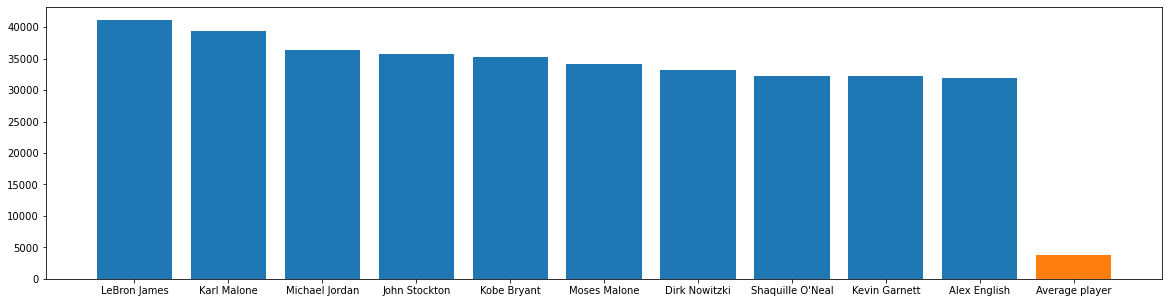

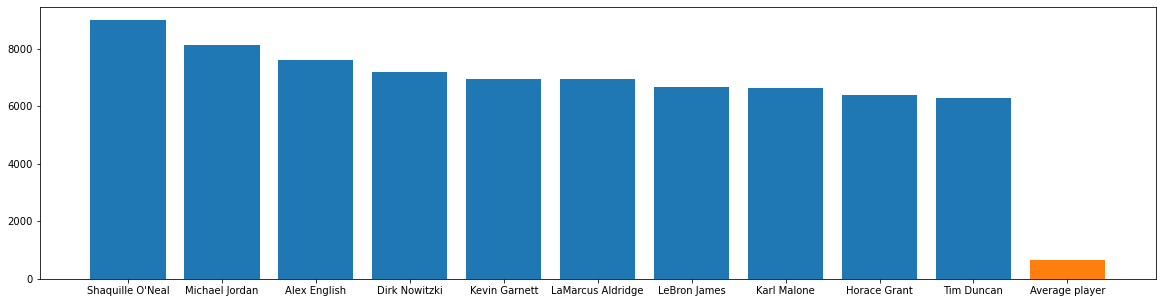

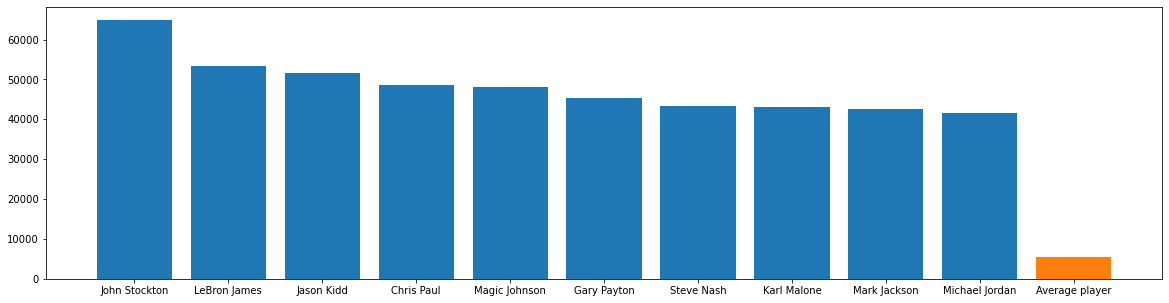

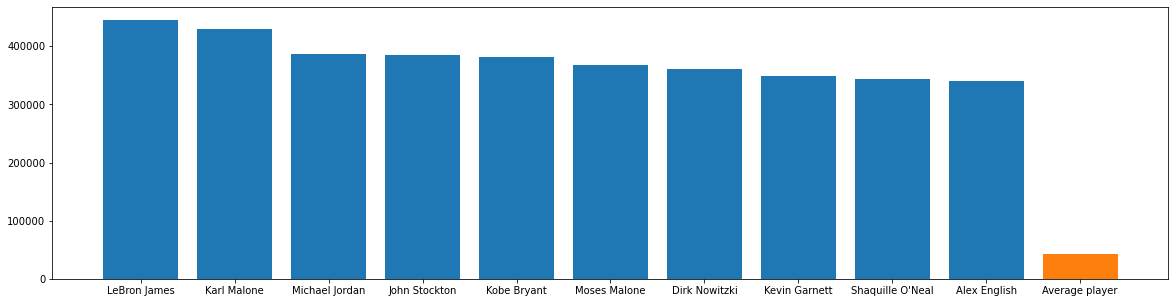

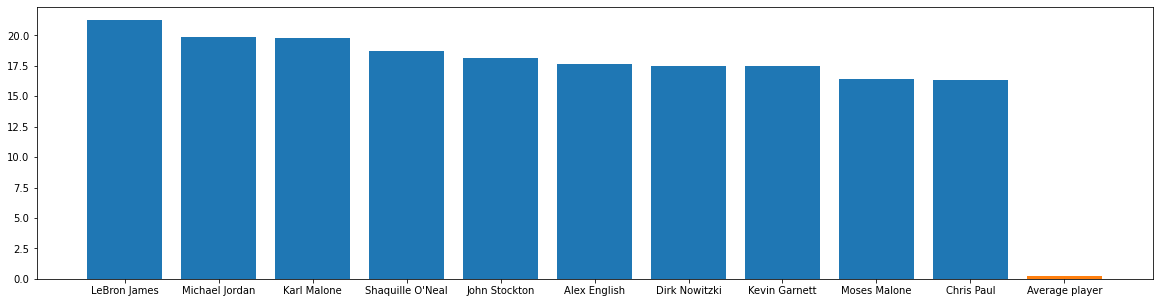

In [30]:
#Offensive weighting

#looking at overall totals
combined['off_rating']= (combined['career_PTS']+1.7*combined['career_AST']-3*combined['career_TOV']+2*combined['career_ORB'])

#incorporating shooting efficiency
combined['off_rating_2']= ((2*combined['career_2P']*combined['career_2P%'])+(3*combined['career_3P']*combined['career_3P%'])
                           +.5*combined['career_AST']-3*combined['career_TOV']+combined['career_ORB'])

#emphasizing team play and looking at games played
combined['off_rating_3']=(.8*combined['career_PTS']+4*combined['career_AST']
                          -4*combined['career_TOV']+3*combined['career_ORB'])


combined['off_rating_4']= (combined['career_PTS']+1.7*combined['career_AST']-3*combined['career_TOV']+2*combined['career_ORB'])*np.log(combined['career_MP'])

combined.sort_values(by=['off_rating'], inplace=True, ascending=False)
plt.figure(figsize=(20, 5))

plt.bar(combined[0:10].index, combined[0:10]['off_rating'])
plt.bar(['Average player'], [combined['career_PTS'].mean()])
print(combined[0:10]['off_rating'])
combined.sort_values(by=['off_rating_2'], inplace=True, ascending=False)
print(combined[0:10]['off_rating_2'])
plt.figure(figsize=(20, 5))

plt.bar(combined[0:10].index, combined[0:10]['off_rating_2'])
plt.bar(['Average player'], [combined['off_rating_2'].mean()])

plt.figure(figsize=(20, 5))
combined.sort_values(by=['off_rating_3'], inplace=True, ascending=False)

plt.bar(combined[0:10].index, combined[0:10]['off_rating_3'])
plt.bar(['Average player'], [combined['off_rating_3'].mean()])

plt.figure(figsize=(20, 5))
combined.sort_values(by=['off_rating_4'], inplace=True, ascending=False)

plt.bar(combined[0:10].index, combined[0:10]['off_rating_4'])
plt.bar(['Average player'], [combined['off_rating_4'].mean()])

#final is combination of ratings
combined['overall_off_rating']= (.9*(combined['off_rating']-combined['off_rating'].mean())/combined['off_rating'].std()+
                                 (combined['off_rating_2']-combined['off_rating_2'].mean())/combined['off_rating_2'].std()+
                                 .7*(combined['off_rating_3']-combined['off_rating_3'].mean())/combined['off_rating_3'].std()+
                                .9*(combined['off_rating_4']-combined['off_rating_4'].mean())/combined['off_rating_4'].std())

plt.figure(figsize=(20, 5))
combined.sort_values(by=['overall_off_rating'], inplace=True, ascending=False)

plt.bar(combined[0:10].index, combined[0:10]['overall_off_rating'])
plt.bar(['Average player'], [combined['overall_off_rating'].mean()])

<BarContainer object of 1 artists>

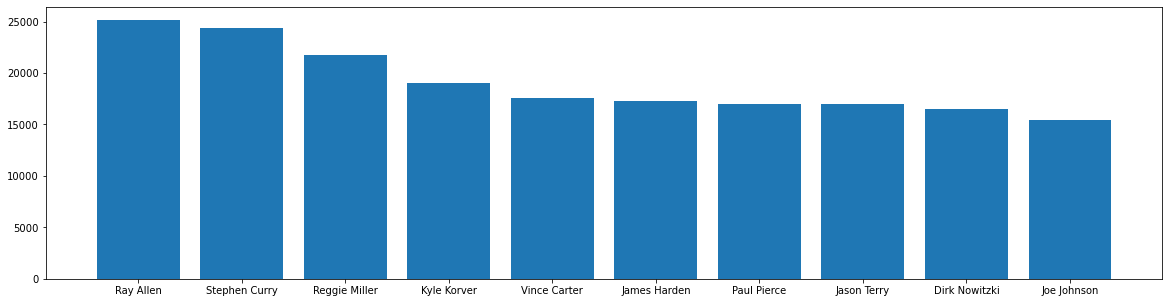

In [27]:
#additional shooting analytics best shooter of all time
combined['shoot_rating_1']= np.log(combined['career_GS'])*(3*combined['career_3P%']*combined['career_3P'])
plt.figure(figsize=(20, 5))
combined.sort_values(by=['shoot_rating_1'], inplace=True, ascending=False)

plt.bar(combined[0:10].index, combined[0:10]['shoot_rating_1'])
plt.bar(['Average player'], [combined['shoot_rating_1'].mean()])

#plt.scatter(combined['career_3P%'],combined['career_3P'])


Player
Hakeem Olajuwon     15706.0
Kevin Garnett       15349.0
Tim Duncan          15277.0
Karl Malone         14636.0
Robert Parish       14212.0
Dwight Howard       13477.0
Patrick Ewing       12887.0
Moses Malone        12649.0
Dirk Nowitzki       12512.0
Shaquille O'Neal    12361.0
Name: def_rating_1, dtype: float64
Player
Hakeem Olajuwon    20030.0
Kevin Garnett      19067.0
Karl Malone        18806.0
Tim Duncan         17327.0
Robert Parish      16698.0
Dwight Howard      15571.0
Jason Kidd         15459.0
LeBron James       15384.0
Patrick Ewing      15159.0
Dirk Nowitzki      14932.0
Name: def_rating_2, dtype: float64


<BarContainer object of 1 artists>

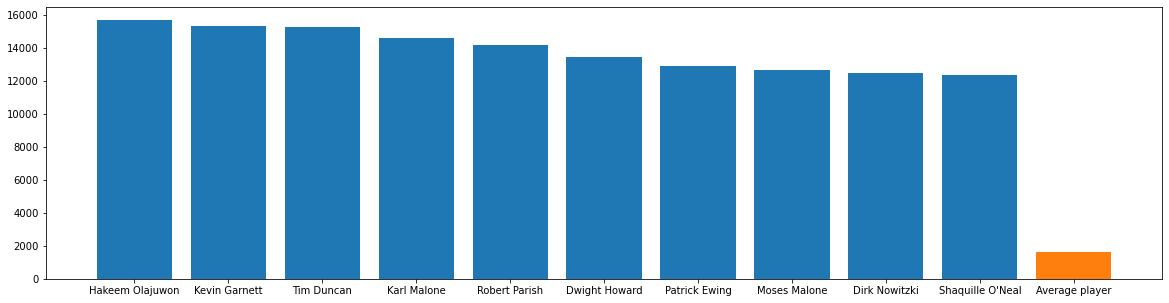

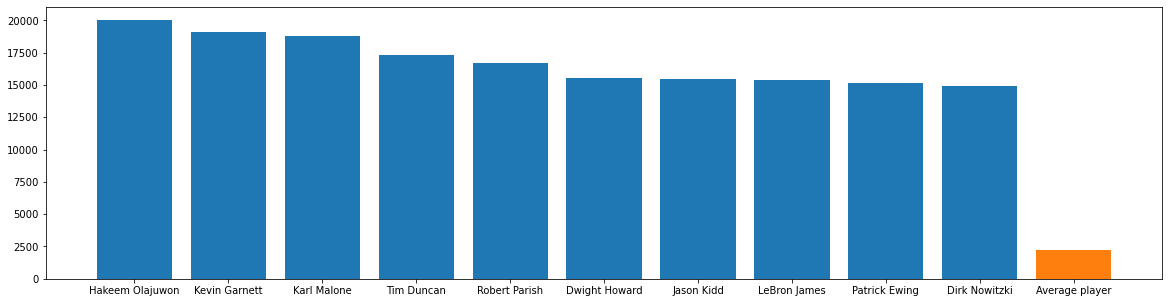

<Figure size 1440x360 with 0 Axes>

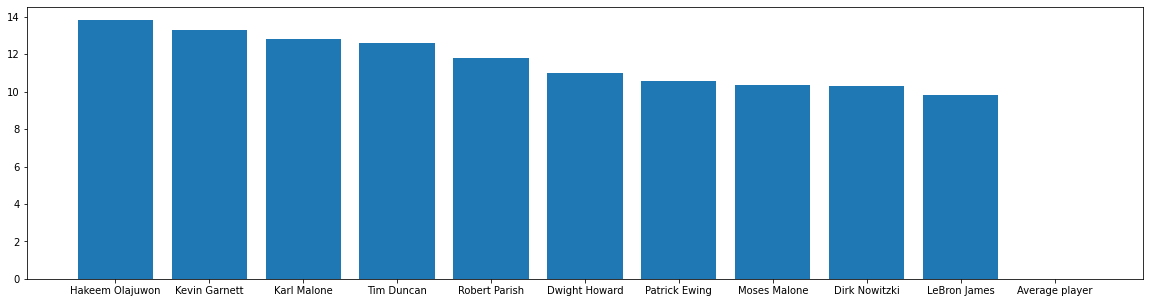

In [28]:
#Offensive weighting

#looking at overall totals
combined['def_rating_1']= (combined['career_BLK']+combined['career_STL']+combined['career_DRB'])

#incorporating shooting efficiency
combined['def_rating_2']= (combined['career_BLK']+3*combined['career_STL']+combined['career_DRB'])


combined.sort_values(by=['def_rating_1'], inplace=True, ascending=False)
plt.figure(figsize=(20, 5))

plt.bar(combined[0:10].index, combined[0:10]['def_rating_1'])
plt.bar(['Average player'], [combined['def_rating_1'].mean()])
print(combined[0:10]['def_rating_1'])
combined.sort_values(by=['def_rating_2'], inplace=True, ascending=False)
print(combined[0:10]['def_rating_2'])
plt.figure(figsize=(20, 5))

plt.bar(combined[0:10].index, combined[0:10]['def_rating_2'])
plt.bar(['Average player'], [combined['def_rating_2'].mean()])

plt.figure(figsize=(20, 5))


#final is combination of ratings
combined['overall_def_rating']= ((combined['def_rating_1']-combined['def_rating_1'].mean())/combined['def_rating_1'].std()+
                                 (combined['def_rating_2']-combined['def_rating_2'].mean())/combined['def_rating_2'].std()
                               )

plt.figure(figsize=(20, 5))
combined.sort_values(by=['overall_def_rating'], inplace=True, ascending=False)

plt.bar(combined[0:10].index, combined[0:10]['overall_def_rating'])
plt.bar(['Average player'], [combined['overall_def_rating'].mean()])



,career_eFG%,career_FT%,career_3P%,career_2P%,career_FG%,career_PF,career_TOV,career_BLK,career_STL,career_AST,...,off_rating,off_rating_2,off_rating_3,off_rating_4,overall_off_rating,shoot_rating_1,def_rating_1,def_rating_2,overall_def_rating,overall_rating
Player,,,,,,,,,,,,,,,,,,,,,
LeBron James,0.465298,1.0,0.344894,0.549884,0.503945,2395.0,4592.0,982.0,2063.0,9696.0,...,41150.2,6671.504377,53323.6,445281.280702,21.264506,14695.906528,11258.0,15384.0,9.830074,26.185617
Michael Jordan,0.485043,1.0,0.326772,0.510172,0.496882,2783.0,2924.0,893.0,2514.0,5633.0,...,36432.1,8129.272536,41673.6,386967.033146,19.892566,3956.192512,8411.0,13439.0,7.656090,22.865185
Karl Malone,0.514517,1.0,0.274194,0.519035,0.516139,4578.0,4524.0,1145.0,2085.0,5248.0,...,39401.6,6638.687617,43124.4,429965.780598,19.782497,509.970639,14636.0,18806.0,12.831269,22.390988
Tim Duncan,0.505065,1.0,0.178571,0.508529,0.505803,3304.0,3381.0,3020.0,1025.0,4225.0,...,31253.5,6274.505476,36149.8,336465.872902,16.217699,116.298311,15277.0,17327.0,12.595189,20.742194
Kevin Garnett,0.492763,1.0,0.275316,0.503706,0.496878,3561.0,3179.0,2037.0,1859.0,5445.0,...,32208.5,6945.778427,39547.8,348756.972648,17.454980,1043.649231,15349.0,19067.0,13.290140,19.841601
Dirk Nowitzki,0.428836,1.0,0.380422,0.495951,0.470591,3601.0,2494.0,1281.0,1210.0,3651.0,...,33220.7,7186.098107,34280.0,360337.315044,17.487772,16481.298531,12512.0,14932.0,10.292292,19.789139
John Stockton,0.484441,1.0,0.383568,0.540725,0.515376,3942.0,4244.0,315.0,3265.0,15806.0,...,35781.2,3807.840558,64914.8,385507.632663,18.159217,6971.826519,6665.0,13195.0,6.681964,19.284920
Hakeem Olajuwon,0.511481,1.0,0.201613,0.513922,0.512077,4383.0,3667.0,3830.0,2162.0,3058.0,...,29211.6,5599.709361,31222.8,312475.833249,14.499074,107.031375,15706.0,20030.0,13.834928,18.046782
Kobe Bryant,0.412424,1.0,0.329427,0.478939,0.447290,3353.0,4010.0,640.0,1944.0,6306.0,...,35331.2,3902.910597,40595.4,381299.251013,15.807373,12798.740656,8132.0,12020.0,6.978098,18.021744


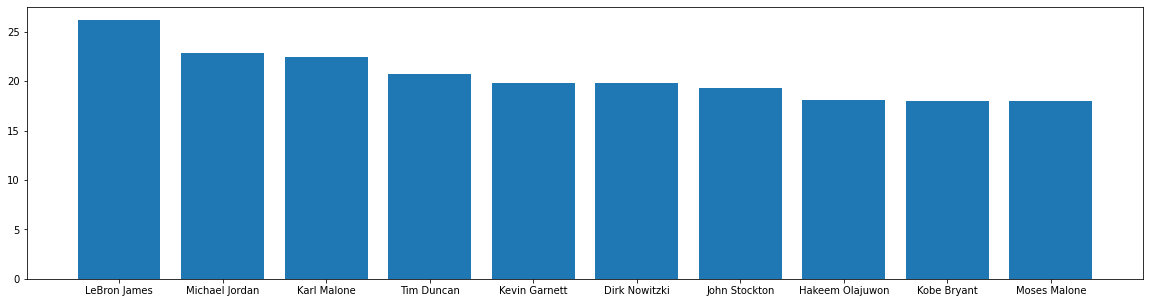

In [29]:
combined['overall_rating']= (.5*(combined['overall_def_rating']-combined['overall_def_rating'].mean())/combined['overall_def_rating'].std()+
                                 3*(combined['overall_off_rating']-combined['overall_off_rating'].mean())/combined['overall_off_rating'].std()
                             +.1*combined['WS']
                            )

plt.figure(figsize=(20, 5))
combined.sort_values(by=['overall_rating'], inplace=True, ascending=False)

plt.bar(combined[0:10].index, combined[0:10]['overall_rating'])


combined[0:10]

In [92]:
combined2017=seasons[2017].merge(seasons[2018],how='outer', on='Player')
combined2017.insert(3,'career_PTS', 0)
combined2017.insert(3,'career_FG', 0)
combined2017.insert(3,'career_G', 0)
combined2017.insert(3,'career_GS', 0)
combined2017.insert(3,'career_MP', 0)
combined2017.insert(3,'career_FGA', 0)

combined2017.insert(3,'career_2P', 0)
combined2017.insert(3,'career_2PA', 0)
combined2017.insert(3,'career_3P', 0)
combined2017.insert(3,'career_3PA', 0)
combined2017.insert(3,'career_FT', 0)
combined2017.insert(3,'career_FTA', 0)
combined2017.insert(3,'career_ORB', 0)
combined2017.insert(3,'career_DRB', 0)

combined2017.insert(3,'career_TRB', 0)
combined2017.insert(3,'career_AST', 0)
combined2017.insert(3,'career_STL', 0)
combined2017.insert(3,'career_BLK', 0)
combined2017.insert(3,'career_TOV', 0)
combined2017.insert(3,'career_PF', 0)
#do percent here
combined2017.insert(3,'career_FG%', 0)
combined2017.insert(3,'career_2P%', 0)
combined2017.insert(3,'career_3P%', 0)
combined2017.insert(3,'career_FT%', 0)
combined2017.insert(3,'career_eFG%', 0)
combined2017 =combined2017.replace(np.NaN,0 )
combined2017 =combined2017.replace('',0 )

for index, row in combined2017.iterrows():
    #print(int(row['PTS_x'])+int(row['PTS_y']))
    combined2017.at[index, 'career_FG']=int(row['FG_x'])+int(row['FG_y'])
    combined2017.at[index, 'career_PTS']= int(row['PTS_x'])+int(row['PTS_y'])
    combined2017.at[index, 'career_G']=int(row['G_x'])+int(row['G_y'])
    combined2017.at[index, 'career_GS']= int(row['GS_x'])+int(row['GS_y'])
    combined2017.at[index, 'career_MP']= int(row['MP_x'])+int(row['MP_y'])
    combined2017.at[index, 'career_FGA']= int(row['FGA_x'])+int(row['FGA_y'])
    
    combined2017.at[index, 'career_2P']=int(row['2P_x'])+int(row['2P_y'])
    combined2017.at[index, 'career_2PA']= int(row['2PA_x'])+int(row['2PA_y'])
    combined2017.at[index, 'career_3P']=int(row['3P_x'])+int(row['3P_y'])
    combined2017.at[index, 'career_3PA']= int(row['3PA_x'])+int(row['3PA_y'])
    combined2017.at[index, 'career_FT']=int(row['FT_x'])+int(row['FT_y'])
    combined2017.at[index, 'career_FTA']= int(row['FTA_x'])+int(row['FTA_y'])
    combined2017.at[index, 'career_ORB']= int(row['ORB_x'])+int(row['ORB_y'])
    combined2017.at[index, 'career_DRB']= int(row['DRB_x'])+int(row['DRB_y'])
    combined2017.at[index, 'career_TRB']= int(row['TRB_x'])+int(row['TRB_y'])
    
    combined2017.at[index, 'career_TRB']= int(row['2PA_x'])+int(row['2PA_y'])
    combined2017.at[index, 'career_FT']=int(row['FT_x'])+int(row['FT_y'])
    combined2017.at[index, 'career_FTA']= int(row['FTA_x'])+int(row['FTA_y'])
    combined2017.at[index, 'career_ORB']= int(row['ORB_x'])+int(row['ORB_y'])
    combined2017.at[index, 'career_DRB']= int(row['DRB_x'])+int(row['DRB_y'])
    
    combined2017.at[index, 'career_TRB']=int(row['TRB_x'])+int(row['TRB_y'])
    combined2017.at[index, 'career_AST']= int(row['AST_x'])+int(row['AST_y'])
    combined2017.at[index, 'career_STL']= int(row['STL_x'])+int(row['STL_y'])
    combined2017.at[index, 'career_BLK']= int(row['BLK_x'])+int(row['BLK_y'])
    
    combined2017.at[index, 'career_TOV']= int(row['TOV_x'])+int(row['TOV_y'])
    combined2017.at[index, 'career_PF']= int(row['PF_x'])+int(row['PF_y'])
    
   

combined2017=combined2017.drop('PTS_y', axis =1)
combined2017=combined2017.drop('FG_y', axis =1)
combined2017=combined2017.drop('PTS_x', axis =1)
combined2017=combined2017.drop('FG_x', axis =1)
combined2017=combined2017.drop('G_x', axis =1)
combined2017=combined2017.drop('G_y', axis =1)
combined2017=combined2017.drop('GS_x', axis =1)
combined2017=combined2017.drop('GS_y', axis =1)
combined2017=combined2017.drop('MP_x', axis =1)
combined2017=combined2017.drop('MP_y', axis =1)
combined2017=combined2017.drop('FGA_x', axis =1)
combined2017=combined2017.drop('FGA_y', axis =1)
combined2017=combined2017.drop('2P_x', axis =1)
combined2017=combined2017.drop('2P_y', axis =1)
combined2017=combined2017.drop('2PA_x', axis =1)
combined2017=combined2017.drop('2PA_y', axis =1)
combined2017=combined2017.drop('3P_x', axis =1)
combined2017=combined2017.drop('3P_y', axis =1)
combined2017=combined2017.drop('3PA_x', axis =1)
combined2017=combined2017.drop('3PA_y', axis =1)
combined2017=combined2017.drop('FT_x', axis =1)
combined2017=combined2017.drop('FT_y', axis =1)
combined2017=combined2017.drop('FTA_x', axis =1)
combined2017=combined2017.drop('FTA_y', axis =1)
combined2017=combined2017.drop('ORB_x', axis =1)
combined2017=combined2017.drop('ORB_y', axis =1)
combined2017=combined2017.drop('DRB_x', axis =1)
combined2017=combined2017.drop('DRB_y', axis =1)
combined2017=combined2017.drop('TRB_x', axis =1)
combined2017=combined2017.drop('TRB_y', axis =1)
combined2017=combined2017.drop('AST_x', axis =1)
combined2017=combined2017.drop('AST_y', axis =1)
combined2017=combined2017.drop('STL_x', axis =1)
combined2017=combined2017.drop('STL_y', axis =1)
combined2017=combined2017.drop('BLK_x', axis =1)
combined2017=combined2017.drop('BLK_y', axis =1)
combined2017=combined2017.drop('TOV_x', axis =1)
combined2017=combined2017.drop('TOV_y', axis =1)
combined2017=combined2017.drop('PF_x', axis =1)
combined2017=combined2017.drop('PF_y', axis =1)


#print(seasons[1997].loc['Michael Jordan'], combined.loc['Michael Jordan'])

In [93]:
year = 2017
  
print(year)
combined2017=combined2017.merge(seasons[year],how='outer', on='Player')
       
combined2017 =combined2017.replace(np.NaN,0 )
   
for index, row in combined2017.iterrows():
        
    combined2017.at[index, 'career_FG']=int(row['career_FG'])+int(row['FG'])
    combined2017.at[index, 'career_PTS']= int(row['career_PTS'])+int(row['PTS'])
    combined2017.at[index, 'career_G']= int(row['career_G'])+int(row['G'])
    combined2017.at[index, 'career_GS']= int(row['career_GS'])+int(row['GS'])
    combined2017.at[index, 'career_MP']= int(row['career_MP'])+int(row['MP'])
    combined2017.at[index, 'career_FGA']= int(row['career_FGA'])+int(row['FGA'])
        
    combined2017.at[index, 'career_2P']=int(row['career_2P'])+int(row['2P'])
    combined2017.at[index, 'career_2PA']= int(row['career_2PA'])+int(row['2PA'])
    combined2017.at[index, 'career_3P']=int(row['career_3P'])+int(row['3P'])
    combined2017.at[index, 'career_3PA']= int(row['career_3PA'])+int(row['3PA'])
    combined2017.at[index, 'career_FT']= int(row['career_FT'])+int(row['FT'])
    combined2017.at[index, 'career_FTA']= int(row['career_FTA'])+int(row['FTA'])
    combined2017.at[index, 'career_ORB']= int(row['career_ORB'])+int(row['ORB'])
    combined2017.at[index, 'career_DRB']= int(row['career_DRB'])+int(row['DRB'])
    combined2017.at[index, 'career_BLK']= int(row['career_BLK'])+int(row['BLK'])
        
    combined2017.at[index, 'career_TRB']=int(row['career_TRB'])+int(row['TRB'])
    combined2017.at[index, 'career_STL']= int(row['career_STL'])+int(row['STL'])
    combined2017.at[index, 'career_AST']= int(row['career_AST'])+int(row['AST'])
    combined2017.at[index, 'career_TOV']= int(row['career_TOV'])+int(row['TOV'])
    combined2017.at[index, 'career_PF']= int(row['career_PF'])+int(row['PF'])

    #combined.at[index, 'career_2P%']= int(row['career_2P'])/(int(row['career_2PA']+1))
    #combined.at[index, 'career_3P%']= int(row['career_3P'])/(int(row['career_3PA']+1))
        
#combined=combined.drop('PTS_y', axis =1)
combined2017=combined2017.drop('PTS', axis =1)
combined2017=combined2017.drop('FG', axis =1)
combined2017=combined2017.drop('G', axis =1)
combined2017=combined2017.drop('GS', axis =1)
combined2017=combined2017.drop('MP', axis =1)
combined2017=combined2017.drop('FGA', axis =1)
    
combined2017=combined2017.drop('2P', axis =1)
combined2017=combined2017.drop('2PA', axis =1)
combined2017=combined2017.drop('3P', axis =1)
combined2017=combined2017.drop('3PA', axis =1)
combined2017=combined2017.drop('FT', axis =1)
combined2017=combined2017.drop('FTA', axis =1)
combined2017=combined2017.drop('ORB', axis =1)
combined2017=combined2017.drop('DRB', axis =1)
combined2017=combined2017.drop('TRB', axis =1)
combined2017=combined2017.drop('AST', axis =1)
combined2017=combined2017.drop('STL', axis =1)
combined2017=combined2017.drop('BLK', axis =1)
combined2017=combined2017.drop('TOV', axis =1)
combined2017=combined2017.drop('PF', axis =1)
combined2017['career_2P%']=combined2017['career_2P']/(combined2017['career_2PA'])
combined2017['career_3P%']=combined2017['career_3P']/(combined2017['career_3PA'])
combined2017['career_FT%']=combined2017['career_FT']/(combined2017['career_FTA'])
combined2017['career_FG%']=combined2017['career_FG']/(combined2017['career_FGA'])

combined2017['career_eFG%']=(combined2017['career_2P']+.5*combined2017['career_3P'])/(combined2017['career_FGA'])

combined2017=combined2017.merge(playoffs,how='left', on='Player')

combined2017.head(25)


2017


,career_eFG%,career_FT%,career_3P%,career_2P%,career_FG%,career_PF,career_TOV,career_BLK,career_STL,career_AST,...,career_3P,career_2PA,career_2P,career_FGA,career_MP,career_GS,career_G,career_FG,career_PTS,WS
Player,,,,,,,,,,,,,,,,,,,,,
Álex Abrines,0.253854,0.881944,0.380420,0.430233,0.393628,352,91,24,112,108,...,272,258,111,973,3244,20,211,383,1165,NaN
Quincy Acy,0.258156,0.772222,0.372881,0.403433,0.382979,283,102,59,61,93,...,176,233,94,705,2475,10,146,270,855,NaN
Steven Adams,0.591494,0.592500,0.000000,0.592666,0.591494,605,420,234,270,260,...,0,2018,1196,2022,7265,236,236,1196,2866,NaN
Arron Afflalo,0.358782,0.886792,0.405914,0.450794,0.434132,264,105,21,46,186,...,151,630,284,1002,3842,93,175,435,1209,NaN
Alexis Ajinça,0.500000,0.725000,0.000000,0.511494,0.500000,154,62,44,40,24,...,0,348,178,356,1168,30,78,178,414,NaN
Cole Aldrich,0.508021,0.640000,NaN,0.508021,0.508021,181,35,47,52,53,...,0,187,95,187,1111,0,145,95,222,NaN
LaMarcus Aldridge,0.479100,0.822529,0.357843,0.497994,0.489695,477,307,266,135,430,...,73,3241,1614,3445,7179,219,219,1687,4221,5.54
Lavoy Allen,0.458333,0.696970,0.000000,0.461078,0.458333,156,58,48,36,114,...,0,334,154,336,1742,10,122,154,354,NaN
Tony Allen,0.448868,0.608541,0.283333,0.480620,0.462139,405,219,61,241,205,...,34,1161,558,1281,4101,132,164,592,1389,NaN


In [94]:
#looking at overall totals
combined2017['off_rating']= (combined2017['career_PTS']+1.7*combined2017['career_AST']-3*combined2017['career_TOV']+2*combined2017['career_ORB'])

#incorporating shooting efficiency
combined2017['off_rating_2']= ((2*combined2017['career_2P']*combined2017['career_2P%'])+(3*combined2017['career_3P']*combined2017['career_3P%'])
                           +.5*combined2017['career_AST']-3*combined2017['career_TOV']+combined2017['career_ORB'])

#emphasizing team play and looking at games played
combined2017['off_rating_3']=(.8*combined2017['career_PTS']+4*combined2017['career_AST']
                          -4*combined2017['career_TOV']+3*combined2017['career_ORB'])


combined2017['off_rating_4']= (combined2017['career_PTS']+1.7*combined2017['career_AST']-3*combined2017['career_TOV']+2*combined2017['career_ORB'])*np.log(combined2017['career_MP'])


#final is combination of ratings
combined2017['overall_off_rating']= (.9*(combined2017['off_rating']-combined2017['off_rating'].mean())/combined2017['off_rating'].std()+
                                 (combined2017['off_rating_2']-combined2017['off_rating_2'].mean())/combined2017['off_rating_2'].std()+
                                 .7*(combined2017['off_rating_3']-combined2017['off_rating_3'].mean())/combined2017['off_rating_3'].std()+
                                .9*(combined2017['off_rating_4']-combined2017['off_rating_4'].mean())/combined2017['off_rating_4'].std())

combined2017['shoot_rating_1']= np.log(combined2017['career_GS'])*(3*combined2017['career_3P%']*combined2017['career_3P'])

#looking at overall totals
combined2017['def_rating_1']= (combined2017['career_BLK']+combined2017['career_STL']+combined2017['career_DRB'])

#incorporating shooting efficiency
combined2017['def_rating_2']= (combined2017['career_BLK']+3*combined2017['career_STL']+combined2017['career_DRB'])

combined2017['overall_def_rating']= ((combined2017['def_rating_1']-combined2017['def_rating_1'].mean())/combined2017['def_rating_1'].std()+
                                 (combined2017['def_rating_2']-combined2017['def_rating_2'].mean())/combined2017['def_rating_2'].std()
                               )

combined2017['overall_rating']= (.5*(combined2017['overall_def_rating']-combined2017['overall_def_rating'].mean())/combined2017['overall_def_rating'].std()+
                                 3*(combined2017['overall_off_rating']-combined2017['overall_off_rating'].mean())/combined2017['overall_off_rating'].std()
                             +.1*combined2017['WS'])


/opt/conda/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [100]:
twitterNBA = pd.read_csv("nba_2017_twitter_players.csv")
twitterNBA = twitterNBA.sort_values(by=['TWITTER_FAVORITE_COUNT'], ascending = False, ignore_index = True)
twitterNBA = twitterNBA.join(combined2017['overall_rating'], on='PLAYER')
# twitterNBA = twitterNBA.replace(np.NaN,0 )
twitterNBA = twitterNBA.dropna()
twitterNBA.head(50)


,PLAYER,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT,overall_rating
0,Stephen Curry,12278.0,2893.0,10.955092
2,LeBron James,5533.5,1501.5,18.300369
3,Kawhi Leonard,2701.5,716.5,7.996044
4,Russell Westbrook,2130.5,559.0,13.276998
6,Dirk Nowitzki,1564.0,500.5,5.386411
7,Kyrie Irving,1541.0,695.0,9.826651
8,Kevin Durant,1425.5,366.0,11.330040
10,James Harden,969.0,321.5,11.637723
12,Pau Gasol,882.5,148.5,5.881661
13,Kevin Love,866.5,194.5,5.384946


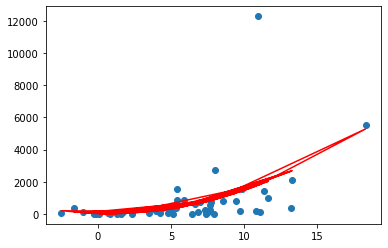

In [110]:
ovr = twitterNBA['overall_rating']
fav = twitterNBA['TWITTER_FAVORITE_COUNT']
plt.scatter(ovr, fav)
m, m2, b = np.polyfit(ovr, fav, 2)
plt.plot(ovr, m*np.square(ovr) + m2*ovr + b, color = 'r')

In [136]:
DC = pd.read_csv('DCPlayers.txt')
MD = pd.read_csv('MDPlayers.txt')
MDCities = MD['City'].value_counts()
MDCities['Washington'] = DC['City'].value_counts()['Washington']
MDCities = pd.DataFrame(MDCities)
MDCities

,City
Baltimore,43
Silver Spring,6
Cheverly,3
Upper Marlboro,2
Rockville,2
Fort Washington,2
Clinton,2
Frederick,2
Berlin,1
Mount Airy,1


In [153]:
!pip install geopy
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")
loc_list = []
for index, row in MDCities.iterrows(): 
    location = geolocator.geocode(index)
    location = [location.latitude, location.longitude]
    loc_list.append(location)


MDCities['location'] = loc_list
MDCities

,City,location
Baltimore,43,"[39.2908816, -76.610759]"
Silver Spring,6,"[38.9997621, -77.02403709829767]"
Cheverly,3,"[38.928167, -76.915807]"
Upper Marlboro,2,"[38.8139804, -76.7575894]"
Rockville,2,"[39.0817985, -77.1516844]"
Fort Washington,2,"[38.7125305, -77.0124598]"
Clinton,2,"[38.5896187, -89.420064]"
Frederick,2,"[39.415779, -77.4127562]"
Berlin,1,"[52.5170365, 13.3888599]"
Mount Airy,1,"[40.0640001, -75.1865661]"


In [170]:
import folium
map_osm = folium.Map(location=[39.29, -76.61], zoom_start=8)

for city, row in MDCities.iterrows(): 
    folium.CircleMarker(
        location=MDCities.at[city, 'location'],
        radius= int(MDCities.at[city, 'City'])/2 + 5,
        popup= str(city) + ": " + str(int(MDCities.at[city, 'City'])),
        color="#3186cc",
        fill=True, 
        fill_color="#3186cc",
        fill_opacity = 0.5
    ).add_to(map_osm)
    
map_osm

Predictor: Predicting Rookie Numbers (PPG, APG, RPG) from combine stats. 
 - Using holdout cross validation
 - Using mean imputation


In [460]:
combineData = pd.read_csv("NBACombineData.csv")

combineData = combineData.rename(columns={'PLAYER': 'Player'})
combineData=combineData.set_index("Player")
# seasons[2011]['Player Name'] = seasons[2011].index
# X = pd.DataFrame(combineData[combineData['YEAR'] == 2010]['Player Name'])
# X['REACH'] = combineData[combineData['YEAR'] == 2010]['REACH']
# X['NO SHOES'] = combineData[combineData['YEAR'] == 2010]['NO SHOES']
# X['WEIGHT'] = combineData[combineData['YEAR'] == 2010]['WEIGHT']
# X['WINGSPAN'] = combineData[combineData['YEAR'] == 2010]['WINGSPAN']
# X['STD VERT'] = combineData[combineData['YEAR'] == 2010]['STD VERT']
# X['MAX VERT'] = combineData[combineData['YEAR'] == year]['MAX VERT']
# X['3/4 SPRINT'] = combineData[combineData['YEAR'] == year]['3/4 SPRINT']
# X['BENCH'] = combineData[combineData['YEAR'] == year]['BENCH']
# X['BODY FAT %'] = combineData[combineData['YEAR'] == year]['BODY FAT %']
# X['HAND L'] = combineData[combineData['YEAR'] == year]['HAND L']
# X['HAND W'] = combineData[combineData['YEAR'] == year]['HAND W']
# combine = X.merge(seasons[2011], on = "Player Name", how = 'inner')
# X
combineData['BODY FAT %'] = combineData['BODY FAT %'].apply(lambda x: x if type(x) == float else float(x[0:len(x)-1]))
combineData['BENCH'] = combineData['BENCH'].replace('-', np.nan)
combineData = combineData.astype({"BENCH": float})
column_means = combineData.mean()
print(column_means)
combineData = combineData.fillna(column_means)
combineData

YEAR          2009.055019
NO SHOES        77.625123
WITH SHOES      78.828767
REACH          103.410463
WEIGHT         216.077263
WINGSPAN        82.431530
WING DIFF        4.791885
SHUTTLE          3.107809
3/4 SPRINT       3.288648
STD VERT        29.160801
MAX VERT        34.300250
BENCH           10.483417
BODY FAT %       7.587106
HAND L           8.741776
HAND W           9.407484
dtype: float64


,YEAR,POS,NO SHOES,WITH SHOES,REACH,WEIGHT,WINGSPAN,WING DIFF,SHUTTLE,3/4 SPRINT,STD VERT,MAX VERT,BENCH,BODY FAT %,HAND L,HAND W
Player,,,,,,,,,,,,,,,,
A.J. Granger,2000,WING,79.50,78.828767,103.0,227.0,81.50,2.00,3.107809,3.25,30.0,34.0,20.000000,7.587106,8.741776,9.407484
A.J. Guyton,2000,COMBO G,72.75,78.828767,97.5,175.0,75.75,3.00,3.107809,3.22,33.0,37.5,9.000000,7.587106,8.741776,9.407484
A.J. Price,2009,PG,72.50,74.000000,97.0,192.8,75.75,3.25,3.107809,3.22,26.0,31.0,11.000000,12.400000,8.741776,9.407484
Aaron Brooks,2007,PG,70.00,71.750000,94.0,161.0,76.00,6.00,3.107809,3.20,32.5,39.5,6.000000,2.700000,8.741776,9.407484
Aaron Craft,2014,PG,72.75,73.750000,94.5,191.6,74.00,1.25,2.900000,3.26,29.0,32.0,10.483417,6.100000,7.750000,8.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach LaVine,2014,PG,76.50,77.750000,100.0,180.9,80.25,3.75,2.800000,3.19,33.5,41.5,10.483417,4.700000,8.250000,8.750000
Zach Marbury,2001,COMBO G,73.25,78.828767,96.5,183.0,75.50,2.25,3.107809,3.10,33.0,36.5,0.000000,6.700000,8.741776,9.407484
Zach Norvell Jr.,2019,WING,76.50,77.500000,101.0,206.4,78.00,1.50,3.340000,3.43,24.0,30.0,10.483417,7.500000,8.500000,9.500000


In [461]:
combine_data={}
for year in range(2000, 2020): 
#     seasons[year + 1]['Player'] = seasons[year + 1].index
    
#     X = pd.DataFrame(combineData[combineData['YEAR'] == year]['Player Name'])
#     X['REACH'] = combineData[combineData['YEAR'] == year]['REACH']
#     X['NO SHOES'] = combineData[combineData['YEAR'] == year]['NO SHOES']
#     X['WEIGHT'] = combineData[combineData['YEAR'] == year]['WEIGHT']
#     X['WINGSPAN'] = combineData[combineData['YEAR'] == year]['WINGSPAN']
#     X['STD VERT'] = combineData[combineData['YEAR'] == year]['STD VERT']
#     X['MAX VERT'] = combineData[combineData['YEAR'] == year]['MAX VERT']
#     X['3/4 SPRINT'] = combineData[combineData['YEAR'] == year]['3/4 SPRINT']
#     X['BENCH'] = combineData[combineData['YEAR'] == year]['BENCH']
#     X['BODY FAT %'] = combineData[combineData['YEAR'] == year]['BODY FAT %']
#     X['HAND L'] = combineData[combineData['YEAR'] == year]['HAND L']
#     X['HAND W'] = combineData[combineData['YEAR'] == year]['HAND W']
#     combineData[combineData['YEAR'] == year] = pd.merge(X, seasons[year + 1], on = 'Player Name')
    #combine = pd.concat([combine, pd.merge(X, seasons[year + 1], on = 'Player Name')])
#     combineData[combineData['YEAR'] == year] = combineData[combineData['YEAR'] == year].join(seasons[year + 1], on = 'Player Name')
#     seasons[2011].merge(combineData, on='Player', how='inner')

    combine_data[year]=seasons[year + 1].merge(combineData[combineData['YEAR'] == year], on='Player', how='inner')
combine_data[2019]

,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,...,WINGSPAN,WING DIFF,SHUTTLE,3/4 SPRINT,STD VERT,MAX VERT,BENCH,BODY FAT %,HAND L,HAND W
Player,,,,,,,,,,,,,,,,,,,,,
Nickeil Alexander-Walker,47,1,591,98,266,46,133,52,133,25,...,81.50,5.25,3.107809,3.288648,29.160801,34.30025,10.483417,5.900000,8.50,8.75
Darius Bazley,61,9,1130,125,317,49,141,76,176,43,...,84.00,4.25,2.950000,3.270000,30.500000,37.00000,4.000000,3.600000,9.00,9.75
Bol Bol,7,0,87,14,28,4,9,10,19,8,...,91.00,6.25,3.107809,3.288648,29.160801,34.30025,10.483417,7.100000,9.25,9.50
Jordan Bone,10,0,53,5,20,2,10,3,10,0,...,75.25,1.75,2.780000,3.080000,36.000000,42.50000,7.000000,5.000000,7.50,9.25
Ky Bowman,45,12,1015,134,321,33,107,101,214,34,...,79.00,6.00,3.110000,3.260000,27.500000,33.00000,4.000000,4.900000,8.25,9.00
Ignas Brazdeikis,9,0,53,6,22,1,9,5,13,4,...,81.25,3.50,3.170000,3.360000,31.000000,36.50000,13.000000,6.000000,8.75,9.50
Moses Brown,9,0,33,4,10,0,0,4,10,3,...,88.75,3.50,3.300000,3.510000,27.000000,31.00000,10.483417,7.800000,9.50,10.25
Brandon Clarke,58,4,1300,296,479,23,64,273,415,85,...,80.25,1.00,3.050000,3.150000,34.000000,40.50000,10.000000,4.900000,8.25,9.50
Nicolas Claxton,15,0,187,27,48,1,7,26,41,11,...,86.50,3.75,3.470000,3.360000,31.500000,36.50000,8.000000,4.500000,9.25,9.50


In [502]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = combine_data[2019][['NO SHOES', 'REACH', 'WEIGHT', 'WINGSPAN', 'STD VERT', 'MAX VERT', '3/4 SPRINT', 'BENCH', 'BODY FAT %', 'HAND L', 'HAND W']]
y = combine_data[2019][['PTS', 'AST', 'TRB']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

forestClass = RandomForestClassifier(n_estimators = 100)
forestClass = forestClass.fit(X, y)



In [503]:
forestClass.predict([[76.5, 100.0, 180.9, 80.25, 3.19, 33.5, 41.5, 10.483417, 4.700000, 8.250000, 8.750000]])



array([['102', '44', '46']], dtype=object)

In [430]:
# test = pd.DataFrame(combineData[combineData['YEAR'] == 2010]['Player Name'])
# test['REACH'] = combineData[combineData['YEAR'] == 2010]['REACH']
# test['NO SHOES'] = combineData[combineData['YEAR'] == 2010]['NO SHOES']
# test['WEIGHT'] = combineData[combineData['YEAR'] == 2010]['WEIGHT']
# test['WINGSPAN'] = combineData[combineData['YEAR'] == 2010]['WINGSPAN']
# test['STD VERT'] = combineData[combineData['YEAR'] == 2010]['STD VERT']
# test['MAX VERT'] = combineData[combineData['YEAR'] == 2010]['MAX VERT']
# test['3/4 SPRINT'] = combineData[combineData['YEAR'] == 2010]['3/4 SPRINT']
# test['BENCH'] = combineData[combineData['YEAR'] == 2010]['BENCH']
# test['BODY FAT %'] = combineData[combineData['YEAR'] == 2010]['BODY FAT %']
# test['HAND L'] = combineData[combineData['YEAR'] == 2010]['HAND L']
# test['HAND W'] = combineData[combineData['YEAR'] == 2010]['HAND W']

In [505]:
season1819 = seasons[2018].merge(seasons[2019], on = 'Player')
X = season1819[['PTS_x']]
y = season1819[['PTS_y']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

forestClass = RandomForestClassifier(n_estimators = 100)
forestClass = forestClass.fit(X, y)

<ipython-input-505-3edd3d254d89>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forestClass = forestClass.fit(X, y)


In [508]:
forestClass.predict([[115]])

array(['288'], dtype=object)

In [500]:
season1819.loc['LaMarcus Aldridge']

G_x                             75
GS_x                            75
MP_x                          2509
FG_x                           687
FGA_x                         1347
3P_x                            27
3PA_x                           92
2P_x                           660
2PA_x                         1255
FT_x                           334
FTA_x                          399
ORB_x                          246
DRB_x                          389
TRB_x                          635
AST_x                          152
STL_x                           43
BLK_x                           90
TOV_x                          111
PF_x                           161
PTS_x                         1735
Player Name_x    LaMarcus Aldridge
G_y                             81
GS_y                            81
MP_y                          2687
FG_y                           684
FGA_y                         1319
3P_y                            10
3PA_y                           42
2P_y                